In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New Section

In [0]:
data=pd.read_csv('/content/covid19_italy_region.csv')

In [3]:
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [4]:
data.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [5]:
data.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,1113.00000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,556.00000,10.190476,43.046293,12.225955,763.703504,107.523810,871.227314,1355.204852,2226.432165,151.781671,534.781671,361.925427,3123.139263,17353.315364
std,321.43973,5.797669,2.489900,2.660143,1913.884740,217.669077,2127.373795,2764.823686,4753.325164,317.771993,2044.057913,1309.590387,7939.941536,33793.972235
min,0.00000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,0.000000,0.000000,0.000000
25%,278.00000,5.000000,41.125596,11.121231,15.000000,3.000000,18.000000,23.000000,46.000000,6.000000,0.000000,0.000000,50.000000,531.000000
50%,556.00000,10.000000,43.616760,12.388247,130.000000,28.000000,164.000000,331.000000,567.000000,48.000000,20.000000,25.000000,647.000000,4304.000000
75%,834.00000,15.000000,45.434905,13.768136,601.000000,108.000000,694.000000,1237.000000,1973.000000,137.000000,214.000000,181.000000,2349.000000,17845.000000
max,1112.00000,20.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,20702.000000,33090.000000,3251.000000,18396.000000,11608.000000,63094.000000,232674.000000


In [6]:
data.isnull().sum()

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

In [7]:
data.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

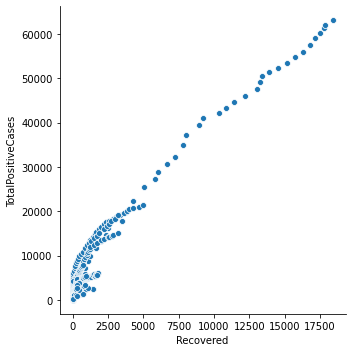

In [8]:
sns.relplot(y='TotalPositiveCases',x='Recovered',data=data)

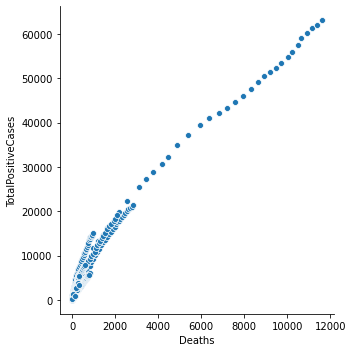

In [9]:
sns.relplot(y='TotalPositiveCases',x='Deaths',data=data)

In [0]:
sns.pairplot(data)

In [0]:
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [0]:
import plotly
import plotly.express as px
plt.rcParams['figure.figsize']=17,8
import plotly.graph_objects as go

import plotly.tools as tls


In [0]:
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [0]:
import folium

In [0]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [0]:
df1=pd.read_csv('/content/covid_19_india.csv')
df1.head()

In [0]:
df1

In [0]:
df=pd.read_excel('/content/Covid cases in India.xlsx')

In [0]:
df

In [0]:
df.drop(['S. No.'],axis=1,inplace=True)

In [0]:
df.columns

In [0]:
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [0]:
df

In [0]:
df['Total cases'].sum()

In [0]:
df['Active caes']=df['Total cases']-(df['Cured']+df['Death'])

In [0]:
df

In [0]:
df.style.background_gradient(cmap='Reds')

In [0]:
Total_active_cases=df.groupby('Name of State / UT')['Total cases'].sum().sort_values(ascending=False).to_frame()

In [0]:
Total_active_cases.style.background_gradient(cmap='Reds')

In [0]:
df.plot(kind='bar',x='Name of State / UT',y='Total cases')

In [0]:
plt.bar(df['Name of State / UT'],df['Total cases'])

In [0]:
df.iplot(kind='bar',x='Name of State / UT',y='Total cases')
plt.show()

In [0]:
px.bar(df,x='Name of State / UT',y='Total cases')

In [0]:
df.plot(kind='scatter',x='Name of State / UT',y='Total cases')

In [0]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total cases',mode='markers+lines')
px.scatter(df,x='Name of State / UT',y='Total cases')

In [0]:
 fig=plt.figure(figsize=(20,10),dpi=200)
 axes=fig.add_axes([0,0,1,1])
 axes.bar(df['Name of State / UT'],df['Total cases'])
 axes.set_title("Total Cases in india")
 axes.set_xlabel("Name of state/UT")
 axes.set_ylabel("Total Cases")

 fig=go.Figure()
 fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total cases']))

In [0]:
Indian_cord=pd.read_excel('/content/Indian Coordinates.xlsx')
Indian_cord

In [0]:
df_full=pd.merge(Indian_cord,df,on='Name of State / UT')

In [0]:
df_full

In [0]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

In [0]:
for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.01,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total cases</strong>: '+str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.03).add_to(map)

In [0]:
map

In [0]:
dbd_india=pd.read_csv('/content/covid_19_india (1).csv')
dbd_india

In [0]:
dbd_italy=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_italy




In [0]:
dbd_korea=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_korea

In [0]:
dbd_wuhan=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')
dbd_wuhan

In [0]:
f, ax = plt.subplots(figsize=(12,8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 3500), ylabel="States",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [0]:
 df_full.columns

In [0]:
data.head()

In [0]:
import plotly
plotly.io.renderers.default = 'colab'
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y = dbd_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(dbd_india, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:
 fig = px.bar(dbd_india, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_korea['Date'], y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_italy['Date'], y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_india['Date'], y=dbd_india['Confirmed'],
                    marker=dict(color=dbd_india['Confirmed'], coloraxis="coloraxis")),2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{"colspan": 2}, None]], subplot_titles=("S.Korea","Italy", "India"))
fig.add_trace(go.Scatter(x=dbd_korea['Date'], y=dbd_korea['Total Cases'], marker=dict(color=dbd_korea['Total Cases'], coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Scatter(x=dbd_italy['Date'], y=dbd_italy['Total Cases'], marker=dict(color=dbd_italy['Total Cases'], coloraxis="coloraxis")), 1, 2)
fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Confirmed'], marker=dict(color=dbd_india['Confirmed'], coloraxis="coloraxis")), 2, 1)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [0]:
df = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])

df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv("/content/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/content/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/content/time_series_covid_19_deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df_deaths.head()

In [0]:
df.head()

In [0]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()


In [0]:
df.query('Country=="India"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [0]:

df.groupby('Date').sum().head()

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [0]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [0]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], animation_frame="Date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [0]:
confirmed_forecast_plot = m.plot(forecast)

In [0]:
confirmed_forecast_plot =m.plot_components(forecast)

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [0]:
deaths_forecast_plot = m.plot(forecast)

In [0]:
deaths_forecast_plot = m.plot_components(forecast)